# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
%matplotlib inline

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [102]:
# Combine the data into a single DataFrame
#mouse_metadata.head()
#study_results.head()
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [103]:
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [104]:
# Checking the number of mice.
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [105]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merge_df.reindex(columns=['Mouse ID', 'Timepoint', 'Drug Regimen', 
                                           'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)',
                                           'Metastatic Sites'])      
#duplicate_mice = duplicate_mice.groupby(["Mouse ID"])
duplicate_mice.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1


In [106]:
#Checking for duplicates
##XPERT LEARNING ASSISTANT

checking_list = duplicate_mice[duplicate_mice.duplicated(subset=['Mouse ID', 'Timepoint'])][['Mouse ID', 'Timepoint']]

print(checking_list)

    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [107]:
# Optional: Get all the data for the duplicate mouse

In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

##XPERT LEARNING ASSISTANT
duplicate_list_clean = duplicate_mice.drop_duplicates(subset=['Mouse ID', 'Timepoint'])[['Mouse ID', 'Timepoint','Drug Regimen', 
                                           'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 
                                           'Metastatic Sites' ]]
duplicate_list_clean


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [109]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_ids = duplicate_list_clean['Mouse ID'].unique()
mouse_ID_unique = len(unique_mouse_ids)
print(mouse_ID_unique)

249


## Summary Statistics

In [110]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

summary_stats = merge_df['Tumor Volume (mm3)'].describe()
print(summary_stats)

count    1893.000000
mean       50.448381
std         8.894722
min        22.050126
25%        45.000000
50%        48.951474
75%        56.292200
max        78.567014
Name: Tumor Volume (mm3), dtype: float64


In [111]:
# Use grouspby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = duplicate_list_clean.groupby('Drug Regimen')

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats_per_regimen = grouped_data['Tumor Volume (mm3)'].describe()
print(summary_stats_per_regimen)

# Assemble the resulting series into a single summary DataFrame.
summary_stats_grouped_df = pd.DataFrame(summary_stats_per_regimen)
summary_stats_grouped_df

              count       mean       std        min        25%        50%  \
Drug Regimen                                                                
Capomulin     230.0  40.675741  4.994774  23.343598  37.685933  41.557809   
Ceftamin      178.0  52.591172  6.268188  45.000000  47.208427  51.776157   
Infubinol     178.0  52.884795  6.567243  36.321346  47.312353  51.820584   
Ketapril      188.0  55.235638  8.279709  45.000000  48.232987  53.698743   
Naftisol      186.0  54.331565  8.134708  45.000000  47.285874  52.509285   
Placebo       181.0  54.033581  7.821003  45.000000  47.459053  52.288934   
Propriva      156.0  52.393463  6.568014  45.000000  47.046068  50.909965   
Ramicane      228.0  40.216745  4.846308  22.050126  36.674635  40.673236   
Stelasyn      181.0  54.233149  7.710419  45.000000  48.047139  52.431737   
Zoniferol     182.0  53.236507  6.966589  45.000000  47.337876  51.818479   

                    75%        max  
Drug Regimen                        
C

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [112]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
summary_stats_grouped_df1 = np.array(summary_stats_grouped_df)
mean = np.mean(summary_stats_grouped_df1)
median = np.median(summary_stats_grouped_df1)
variance = np.var(summary_stats_grouped_df1)
std = np.std(summary_stats_grouped_df1)
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

## Bar and Pie Charts

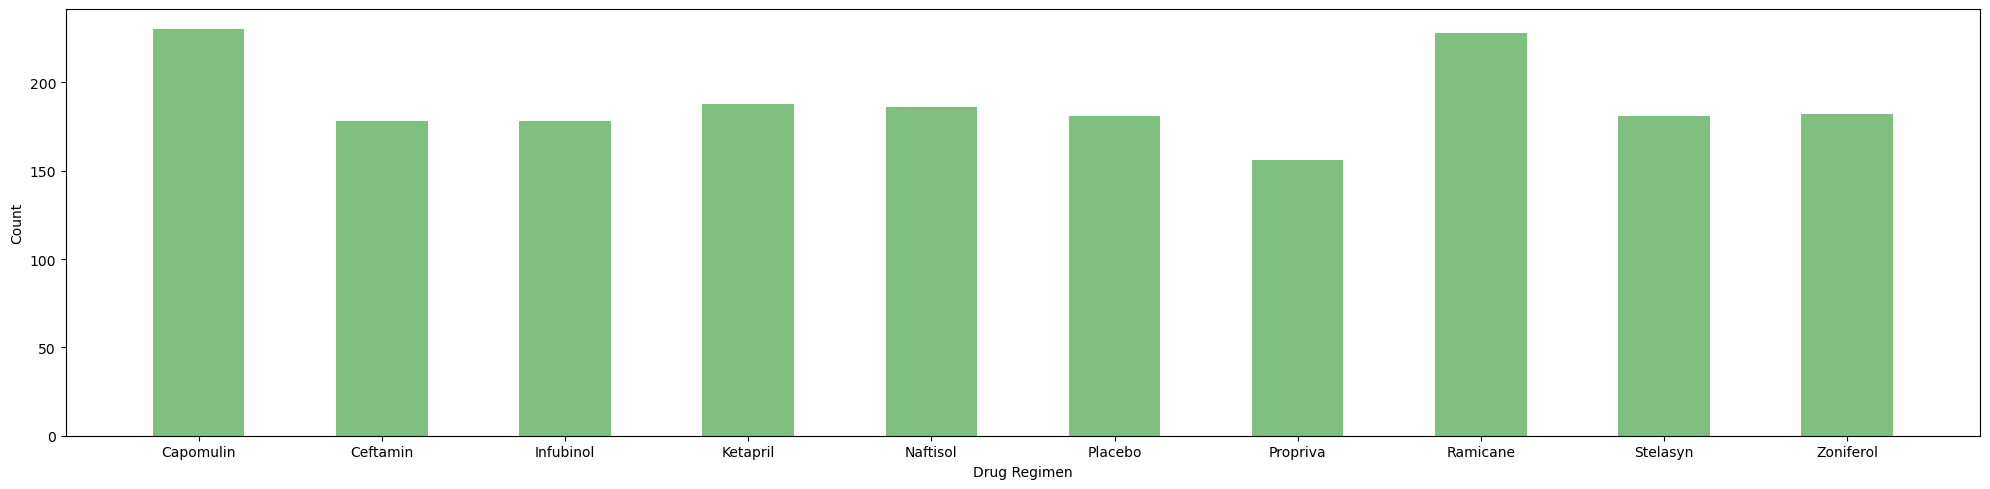

In [113]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

count_rows_per_regimen = duplicate_list_clean.groupby('Drug Regimen').size() 

tick_locations = x_axis  # Simplified tick locations

# Plot
plt.figure(figsize=(20, 5))
plt.bar(x_axis, count_rows_per_regimen, color='g', alpha=0.5, align="center", width=0.5)
plt.xticks(tick_locations, count_rows_per_regimen.index, rotation="horizontal")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

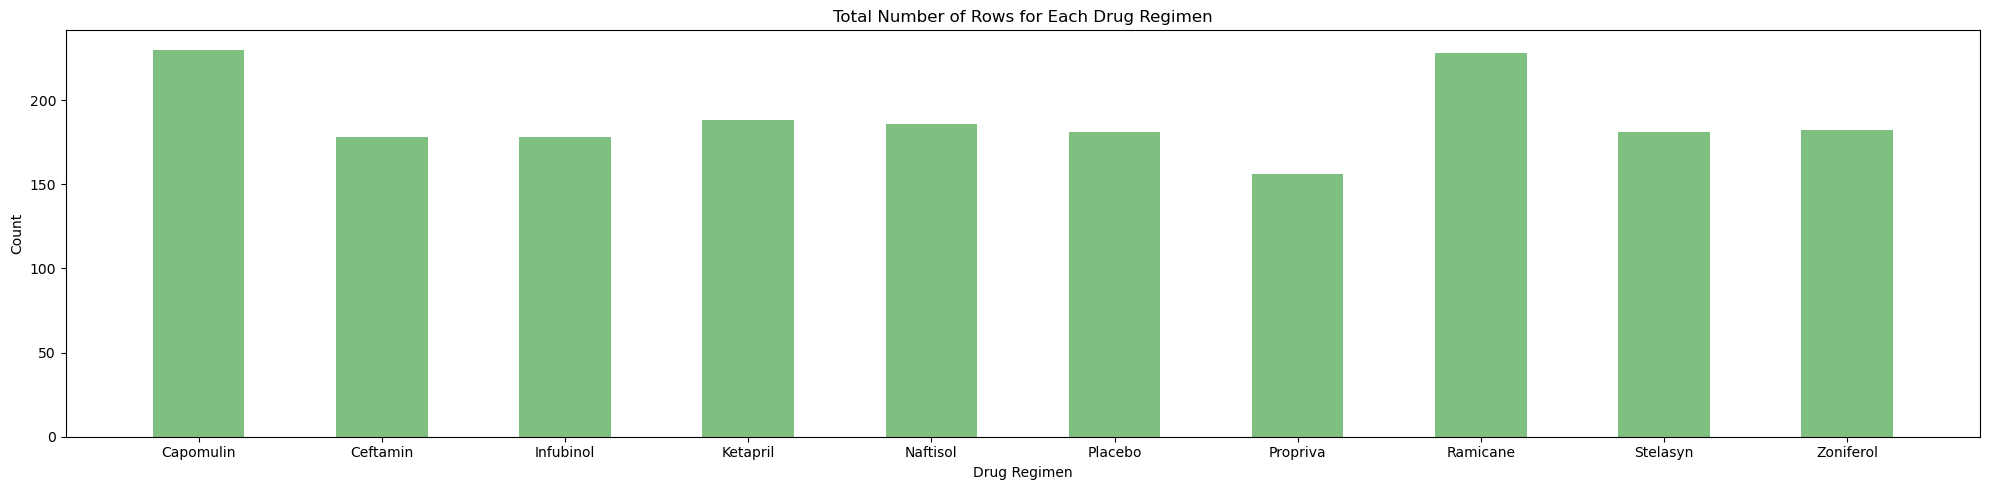

In [114]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = duplicate_list_clean['Drug Regimen'].values
unique_regimens, regimen_counts = np.unique(drug_regimens, return_counts=True)
x_axis = np.arange(len(count_rows_per_regimen))



plt.figure(figsize=(20, 5))
plt.bar(x_axis, regimen_counts, color='g', alpha=0.5, align="center", width=0.5)
plt.xticks(x_axis, unique_regimens, rotation="horizontal")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Total Number of Rows for Each Drug Regimen")
plt.tight_layout()
plt.show()

(-1.0999999924791486,
 1.099999956535862,
 -1.099999963869275,
 1.0999999982794892)

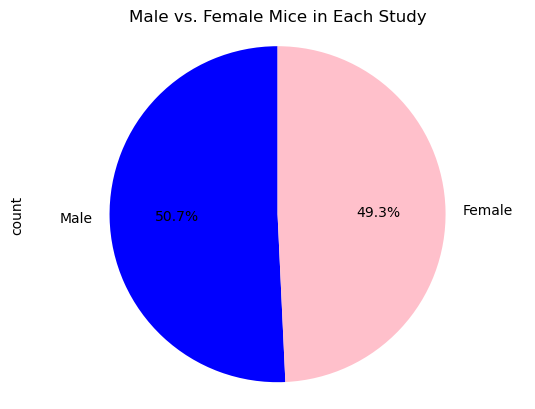

In [115]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
Pie_values.plot.pie(autopct='%1.1f%%', explode=(0.0, 0.0), shadow=False, startangle=90, colors=['blue', 'pink'])
plt.title("Male vs. Female Mice in Each Study")
plt.axis('equal')  


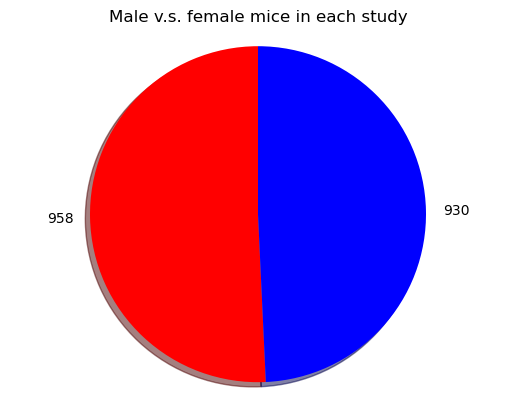

In [116]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
Pie_values = duplicate_list_clean['Sex'].value_counts()
explode = (0, 0)
plt.title("Male v.s. female mice in each study")
plt.pie(Pie_values, explode=explode, shadow=True, startangle=90, labels =Pie_values, colors = ['red', 'blue'])
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

tumor_volume_across_regimens = duplicate_list_clean.groupby('Mouse ID')['Timepoint'].max().reset_index()
tumor_volume_across_regimens

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_across_regimens1 = pd.merge(tumor_volume_across_regimens, duplicate_list_clean, on=['Mouse ID', 'Timepoint'], how='left')
tumor_volume_across_regimens1


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [119]:
treatments = duplicate_list_clean['Drug Regimen'].unique().tolist()

tumor_vol_data = {}
outliers_data = {}

for treatment in treatments:
    treatment_data = duplicate_list_clean[duplicate_list_clean['Drug Regimen'] == treatment]
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    
    tumor_vol_data[treatment] = tumor_volumes.tolist()
    
    quartile_1 = tumor_volumes.quantile(0.25)
    quartile_3 = tumor_volumes.quantile(0.75)
    iqr = quartile_3 - quartile_1
    
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr
    
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    outliers_data[treatment] = outliers.tolist()



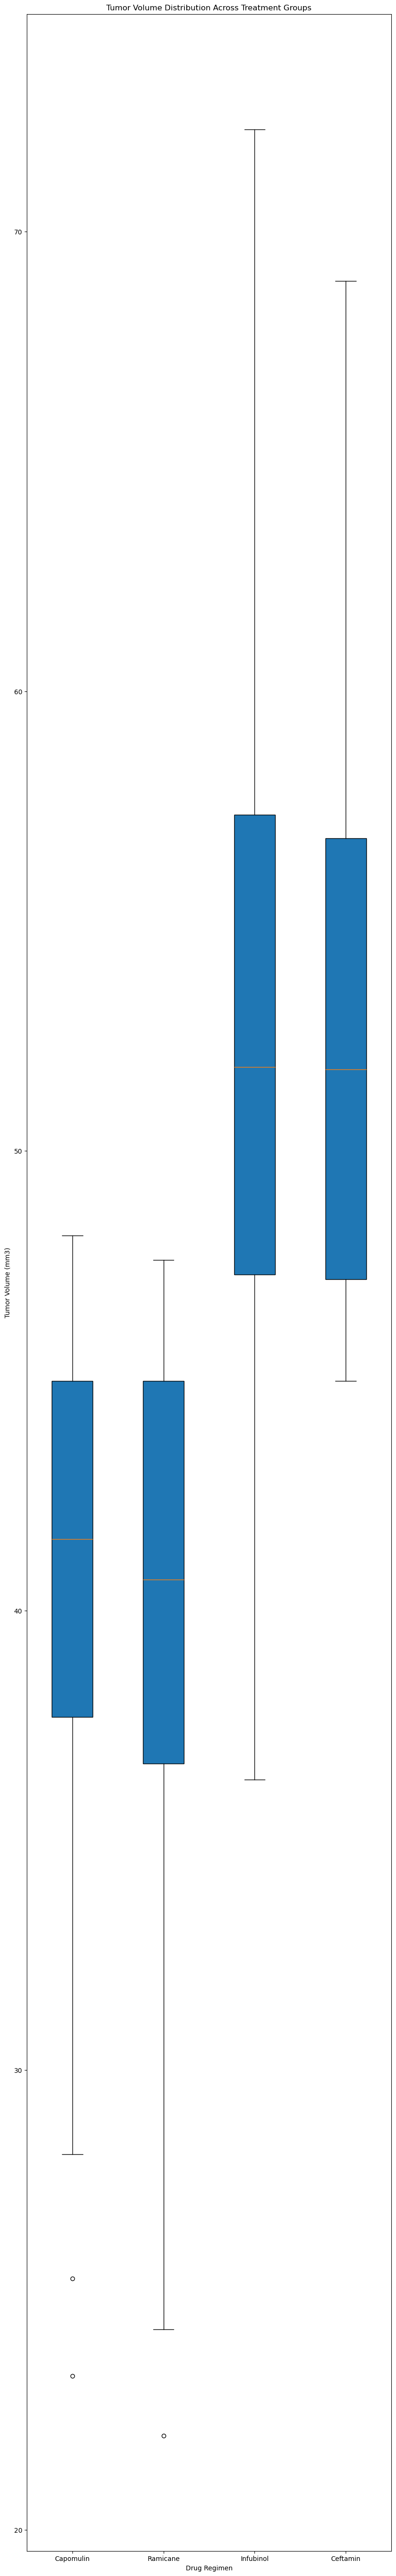

In [121]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = [duplicate_list_clean[duplicate_list_clean['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

plt.figure(figsize=(10, 70))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)
plt.title("Tumor Volume Distribution Across Treatment Groups")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
